In [2]:
%load_ext autoreload
%autoreload 2
import os
from pyannote.core import json
import src.embedding_extractor as ee
import pandas as pd

diarized_dir = '/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/031622_diarized'

In [3]:
diarized = [(json.load_from(os.path.join(diarized_dir,file)),file) for file in os.listdir(diarized_dir)]
diarized

[(<pyannote.core.annotation.Annotation at 0x7faea12c08e0>, '007.json'),
 (<pyannote.core.annotation.Annotation at 0x7faeb36f5eb0>, '011.json'),
 (<pyannote.core.annotation.Annotation at 0x7fae90d87490>, '010.json'),
 (<pyannote.core.annotation.Annotation at 0x7faea7f75550>, '006.json'),
 (<pyannote.core.annotation.Annotation at 0x7faea7f81d90>, '001.json'),
 (<pyannote.core.annotation.Annotation at 0x7faea7f9daf0>, '017.json'),
 (<pyannote.core.annotation.Annotation at 0x7faea7faf250>, '016.json'),
 (<pyannote.core.annotation.Annotation at 0x7fae90d462b0>, '020.json'),
 (<pyannote.core.annotation.Annotation at 0x7fae90d53550>, '019.json'),
 (<pyannote.core.annotation.Annotation at 0x7fae90d66ac0>, '015.json'),
 (<pyannote.core.annotation.Annotation at 0x7faea7fb6460>, '003.json'),
 (<pyannote.core.annotation.Annotation at 0x7faea7fcf2e0>, '002.json'),
 (<pyannote.core.annotation.Annotation at 0x7faea7fea940>, '014.json'),
 (<pyannote.core.annotation.Annotation at 0x7faea6716e80>, '018.

In [4]:
# don't record Victoria
# make sure background noise is off (e.g. TV, radio)
# can we somehow not record the baby?
# can we control for microphone? 

In [5]:
data_clean_lower = {int(os.path.splitext(part)[0]):data.label_timeline('SPEAKER_01') for data,part in diarized if int(os.path.splitext(part)[0])<11}
data_clean_upper = {int(os.path.splitext(part)[0]):data.label_timeline('SPEAKER_00') for data,part in diarized if int(os.path.splitext(part)[0])>=11}
data_clean = data_clean_lower|data_clean_upper

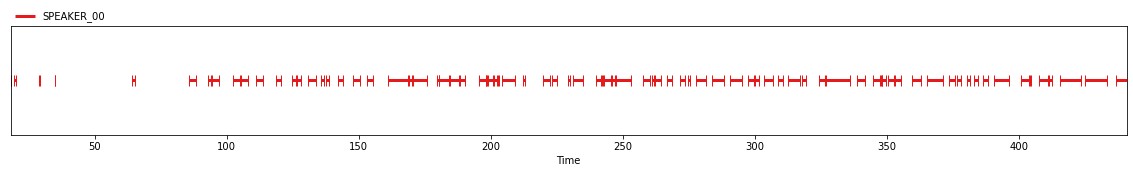

In [17]:
diarized[13][0]

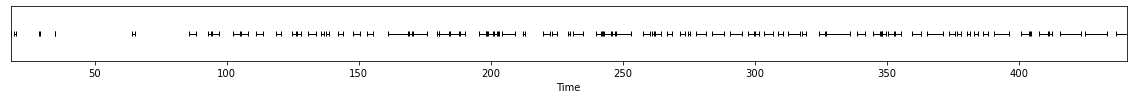

In [18]:
data_clean[18]

In [108]:
wav_files='/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_16khz'
save_dir = '/Users/rahulbrito/Documents/projects/infantvoice/data/embeddings'
save_name = '03016_diarized_pyv2.csv'
emb = ee.pyannote_extract_directory(wav_files, data_clean,save_dir,save_name,save=True)

Processing019.wav
Done


In [107]:
from pyannote.core import Segment, notebook, SlidingWindowFeature, timeline, Timeline

t = 2
long_turns = Timeline(segments=[s for s in data_clean[12] if s.duration > t])

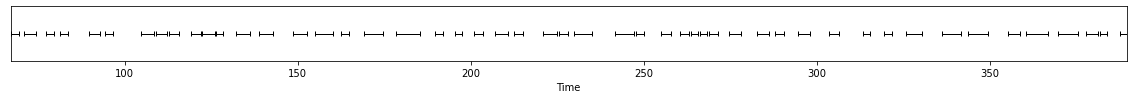

In [78]:
long_turns

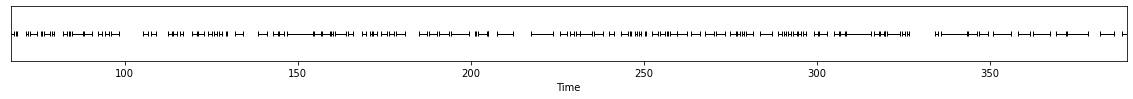

In [117]:
data_clean[11]

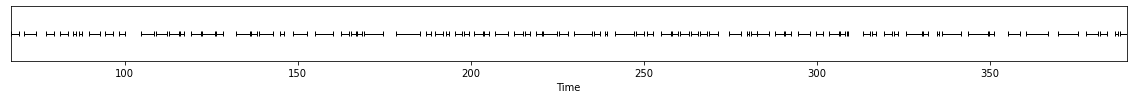

In [76]:
filename = '007.wav'
data_clean[int(os.path.splitext(filename)[0])]

In [118]:
print(data_clean[11])

[[ 00:00:01.185 -->  00:00:02.012]
 [ 00:00:02.586 -->  00:00:03.413]
 [ 00:00:09.302 -->  00:00:09.944]
 [ 00:00:18.921 -->  00:00:19.343]
 [ 00:00:22.701 -->  00:00:23.309]
 [ 00:00:36.100 -->  00:00:37.939]
 [ 00:00:43.778 -->  00:00:44.824]
 [ 00:00:49.364 -->  00:00:50.072]
 [ 00:00:52.755 -->  00:00:56.282]
 [ 00:01:00.737 -->  00:01:02.712]
 [ 00:01:04.433 -->  00:01:05.614]
 [ 00:01:06.070 -->  00:01:06.559]
 [ 00:01:06.711 -->  00:01:07.909]
 [ 00:01:08.635 -->  00:01:08.820]
 [ 00:01:11.453 -->  00:01:12.044]
 [ 00:01:12.719 -->  00:01:14.507]
 [ 00:01:15.773 -->  00:01:16.161]
 [ 00:01:16.701 -->  00:01:18.422]
 [ 00:01:18.945 -->  00:01:19.418]
 [ 00:01:22.000 -->  00:01:23.232]
 [ 00:01:23.772 -->  00:01:24.075]
 [ 00:01:24.615 -->  00:01:27.788]
 [ 00:01:28.109 -->  00:01:30.657]
 [ 00:01:32.226 -->  00:01:33.441]
 [ 00:01:34.285 -->  00:01:35.415]
 [ 00:01:36.141 -->  00:01:38.284]
 [ 00:01:45.169 -->  00:01:46.654]
 [ 00:01:47.532 -->  00:01:48.983]
 [ 00:01:52.560 --> 